## A Plant-Watering World

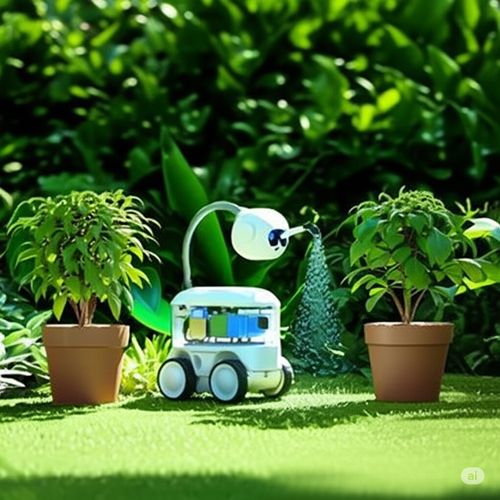

# Agent Description:

**1. Objective:** The agent's objective is to maintain a world where both Plant 1 and Plant 2 are in the watered state. It needs to perform a sequence of actions (moving and watering) to achieve and maintain this desired state.
<br>**2. List of sensors:**
<br>Location, Status
<br>**3. Sensors' values:**
<br>Location -> {Plant 1, Plant 2}, <br>Status -> {Dry, Watered}
<br>**4. List of actions:**
 <br>Move Right,<br>Move Left, <br>Water
<br>**5. Agent function:** **perception --> action**
> (Plant 1, Dry) --> Water <br>
> (Plant 1, Watered) --> Move Right<br>
> (Plant 2, Dry) --> Water <br>
> (Plant 2, Watered) --> Move Left<br>



# Table driven agent

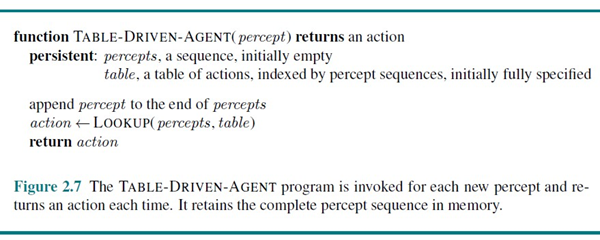

In [ ]:
percepts=[]  # to store percept history

def table_driven_agent(percept):
    print('Perception Received: '+ str(percept))
    percepts.append(percept) # updating percept history
    action = table[percept]
    return action

In [ ]:
# Store the agent fucntion as a table
table={('Plant 1','Dry'):'Water',
       ('Plant 1','Watered'):'Move Right',
       ('Plant 2','Dry'):'Water',
       ('Plant 2','Watered'):'Move Left'}

In [ ]:
import random
Location = random.choice(['Plant 1','Plant 2'])
Condition = random.choice(['Dry','Watered'])

while True:
    action= table_driven_agent((Location,Condition))
    print('Action Performed: '+ action)
    cmd = input('Type x to exit! or any key to continue.')
    if(cmd == 'x'): break
    if action == 'Move Right':
        Location = 'Plant 2'
        Condition = random.choice(['Dry','Watered'])
    elif action== 'Move Left':
        Location = 'Plant 1'
        Condition = random.choice(['Dry','Watered'])
    else:
        Condition = 'Watered'

Perception Received: ('Plant 1', 'Watered')
Action Performed: Move Right
Type x to exit! or any key to continue.d
Perception Received: ('Plant 2', 'Dry')
Action Performed: Water
Type x to exit! or any key to continue.d
Perception Received: ('Plant 2', 'Watered')
Action Performed: Move Left
Type x to exit! or any key to continue.d
Perception Received: ('Plant 1', 'Watered')
Action Performed: Move Right
Type x to exit! or any key to continue.x


# Simple reflex agent

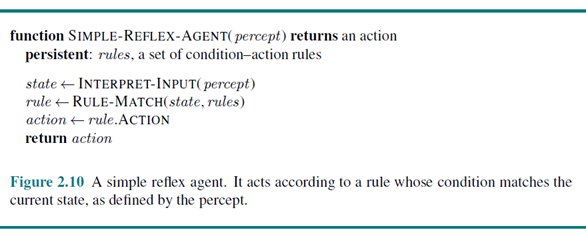

In [ ]:
def simple_reflex_agent(percept):
    print('Perception Received: '+ str(percept))
    location = percept[0]
    status = percept[1]
    if status =='Dry':
        action = 'Water'
    elif location == 'Plant 1':
        action = 'Move Right'
    elif location =='Plant 2':
        action = 'Move Left'
    return action

In [9]:
import random
Location = random.choice(['Plant 1','Plant 2'])
Condition = random.choice(['Dry','Watered'])

while True:
    action= simple_reflex_agent((Location,Condition))
    print('Action Performed: '+ action)
    cmd = input('Type x to exit! or any key to continue.')
    if(cmd == 'x'): break
    if action == 'Move Right':
        Location = 'Plant 2'
        Condition = random.choice(['Dry','Watered'])
    elif action== 'Move Left':
        Location = 'Plant 1'
        Condition = random.choice(['Dry','Watered'])
    else:
        Condition = 'Watered'

TypeError: simple_reflex_agent() missing 2 required positional arguments: 'status' and 'presence'

# Agent Description:

**1. Objective:**
The agent's objective is to maintain a restaurant environment where every occupied table is in the Served state. It must perform a sequence of actions (moving and serving) to achieve and maintain this desired condition.
<br>**2. List of sensors:**
<br>Location,Service Status, Customer Presence
<br>**3. Sensors' values:**
<br>Location → {Table 1, Table 2}

Service Status → {Served, Unserved}

Customer Presence → {Occupied, Empty}
<br>**4. List of actions:**
 <br> Move Next

Move Previous

Serve Water
<br>**5. Agent function:** **perception --> action**
<br>(Table 1, Unserved, Occupied)   --> Serve Water  
(Table 1, Served, Occupied)     --> Move Next  
(Table 1, Unserved, Empty)      --> Move Next  
(Table 1, Served, Empty)        --> Move Next  

(Table 2, Unserved, Occupied)   --> Serve Water  
(Table 2, Served, Occupied)     --> Move Previous  
(Table 2, Unserved, Empty)      --> Move Previous  
(Table 2, Served, Empty)        --> Move Previous  




## Implementation of Table Driven Agent

In [4]:
#CODE
def table_driven_agent(percept):
    print('Perception Received: ' + str(percept))
    percepts.append(percept)  # updating percept history
    action = table[percept]
    return action

In [3]:
# Store percept history
percepts = []

# Perception-Action Table (3 sensors)
table = {
    ('Table 1', 'Unserved', 'Occupied'):    'Serve Water',
    ('Table 1', 'Served', 'Occupied'):      'Move Next',
    ('Table 1', 'Unserved', 'Empty'):       'Move Next',
    ('Table 1', 'Served', 'Empty'):         'Move Next',
    ('Table 2', 'Unserved', 'Occupied'):    'Serve Water',
    ('Table 2', 'Served', 'Occupied'):      'Move Previous',
    ('Table 2', 'Unserved', 'Empty'):       'Move Previous',
    ('Table 2', 'Served', 'Empty'):         'Move Previous',
}

In [5]:
import random

# Initial random state
Location = random.choice(['Table 1', 'Table 2'])
Status = random.choice(['Served', 'Unserved'])
Presence = random.choice(['Occupied', 'Empty'])

while True:
    action = table_driven_agent((Location, Status, Presence))
    print('Action Performed: ' + action)

    cmd = input('Type x to exit, or press Enter to continue: ')
    if cmd == 'x':
        break

    # Update environment based on action
    if action == 'Move Next':
        Location = 'Table 2'
    elif action == 'Move Previous':
        Location = 'Table 1'
    elif action == 'Serve Water':
        Status = 'Served'

    # Randomly update customer presence and status
    if Status != 'Served':
        Status = random.choice(['Served', 'Unserved'])
    Presence = random.choice(['Occupied', 'Empty'])

print("\nPercept History:")
for i, p in enumerate(percepts, 1):
    print(f"{i}. {p}")


Perception Received: ('Table 1', 'Unserved', 'Empty')
Action Performed: Move Next
Type x to exit, or press Enter to continue: x

Percept History:
1. ('Table 1', 'Unserved', 'Empty')


## Implementation of Simple Reflex Agent

In [6]:
#CODE
def simple_reflex_agent(location, status, presence):
    print(f"Perception Received: ({location}, {status}, {presence})")

    if status == 'Unserved' and presence == 'Occupied':
        return 'Serve Water'
    elif location == 'Table 1':
        return 'Move Next'
    elif location == 'Table 2':
        return 'Move Previous'
    else:
        return 'Do Nothing'

In [7]:
# Initial random state
location = random.choice(['Table 1', 'Table 2'])
status = random.choice(['Served', 'Unserved'])
presence = random.choice(['Occupied', 'Empty'])

while True:
    action = simple_reflex_agent(location, status, presence)
    print('Action Performed: ' + action)

    cmd = input('Type x to exit, or press Enter to continue: ')
    if cmd == 'x':
        break

    # Update environment based on action
    if action == 'Move Next':
        location = 'Table 2'
    elif action == 'Move Previous':
        location = 'Table 1'
    elif action == 'Serve Water':
        status = 'Served'

    # Randomly change status and presence for next cycle
    status = random.choice(['Served', 'Unserved'])
    presence = random.choice(['Occupied', 'Empty'])

Perception Received: (Table 2, Served, Occupied)
Action Performed: Move Previous
Type x to exit, or press Enter to continue: 
Perception Received: (Table 1, Served, Empty)
Action Performed: Move Next
Type x to exit, or press Enter to continue: 
Perception Received: (Table 2, Unserved, Occupied)
Action Performed: Serve Water
Type x to exit, or press Enter to continue: x
